<a href="https://colab.research.google.com/github/Hab-eeb/ocr_solve_math/blob/main/Ocr_solve_math_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import cv2
import os
from imutils import contours
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from google.colab.patches import cv2_imshow
# K.set_image_dim_ordering('th')
from keras.models import model_from_json

In [ ]:
#Getting dataset
from google.colab import drive
drive.mount('/content/drive')

! unzip "/content/drive/MyDrive/num_symbol.zip"

Mounted at /content/drive


In [ ]:
#Converting sign images to arrays
add_img = []
# sub_img = []
# mul_img = []
for imgs in os.listdir("/content/content/dataset/add"):
  image_path = "/content/content/dataset/add" + "/" + imgs
  img_arr = cv2.imread(image_path)
  img_arr = cv2.resize(img_arr,(28,28))
  add_img.append(img_arr)

  



In [ ]:
#Getting the numbers images from mnist
(trainX, trainy), (testX, testy) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
#making grayscale
mul_img =[cv2.cvtColor(img,cv2.COLOR_BGR2GRAY ) for img in mul_img]
sub_img =[cv2.cvtColor(img,cv2.COLOR_BGR2GRAY ) for img in sub_img]
add_img =[cv2.cvtColor(img,cv2.COLOR_BGR2GRAY ) for img in add_img]
sub_img[0].shape

(28, 28)

In [ ]:
#inverting color to match mnist
mul_img =[cv2.bitwise_not(img) for img in mul_img]
sub_img =[cv2.bitwise_not(img) for img in sub_img]
add_img =[cv2.bitwise_not(img) for img in add_img]
sub_img[0].shape

(28, 28)

In [ ]:
train_x_n = list(trainX)
train_y_n = list(trainy)

In [ ]:
x= train_x_n + mul_img + sub_img + add_img

In [ ]:
x= [np.reshape(im,(1,28,28)) for im in sign_x ]

In [ ]:
#Creating the y labels for the signs
# add_y =[]
# for l in add_img:
#   add_y.append(13)
y = train_y_n + mul_y + sub_y + add_y

In [ ]:
y = np.array(y)
y.shape

In [ ]:
pd.Series(y).value_counts()

In [ ]:
x = np.array(x)
x.shape

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2,shuffle=True, random_state=1)


In [ ]:
cv2_imshow(np.reshape(x_train[90],(28,28)))

In [ ]:
y_train[8]

In [ ]:
from keras.layers import merge, Input, concatenate
from keras.models import Model
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import MaxPooling2D, Convolution2D
img_rows, img_cols = 28, 28

nb_filters_1 = 64
nb_filters_2 = 128
nb_filters_3 = 256
nb_conv = 3
nb_conv_mid = 4
nb_conv_init = 5

init = Input(shape=(1, 28, 28),)

fork11 = Convolution2D(nb_filters_1, nb_conv_init, nb_conv_init,  activation="relu", padding='same')(init)
fork12 = Convolution2D(nb_filters_1, nb_conv_init, nb_conv_init, activation="relu", padding='same')(init)
merge1 = concatenate([fork11, fork12], axis=1, name='merge1')
# concat_feat = concatenate([concat_feat, x], mode='concat', axis=concat_axis, name='concat_'+str(stage)+'_'+str(branch))
maxpool1 = MaxPooling2D(strides=(2,2), padding='same')(merge1)

fork21 = Convolution2D(nb_filters_2, nb_conv_mid, nb_conv_mid, activation="relu", padding='same')(maxpool1)
fork22 = Convolution2D(nb_filters_2, nb_conv_mid, nb_conv_mid, activation="relu", padding='same')(maxpool1)
merge2 = concatenate([fork21, fork22, ], axis=1, name='merge2')
maxpool2 = MaxPooling2D(strides=(2,2), padding='same')(merge2)

fork31 = Convolution2D(nb_filters_3, nb_conv, nb_conv, activation="relu", padding='same')(maxpool2)
fork32 = Convolution2D(nb_filters_3, nb_conv, nb_conv, activation="relu", padding='same')(maxpool2)
fork33 = Convolution2D(nb_filters_3, nb_conv, nb_conv, activation="relu", padding='same')(maxpool2)
fork34 = Convolution2D(nb_filters_3, nb_conv, nb_conv, activation="relu", padding='same')(maxpool2)
fork35 = Convolution2D(nb_filters_3, nb_conv, nb_conv, activation="relu", padding='same')(maxpool2)
fork36 = Convolution2D(nb_filters_3, nb_conv, nb_conv, activation="relu", padding='same')(maxpool2)
merge3 = concatenate([fork31, fork32, fork33, fork34, fork35, fork36, ], axis=1, name='merge3')
maxpool3 = MaxPooling2D(strides=(2,2), padding='same')(merge3)

dropout = Dropout(0.5)(maxpool3)

flatten = Flatten()(dropout)
output = Dense(15, activation="softmax")(flatten)

model = Model(init, output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1, 28, 28)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 1, 6, 64)     44864       ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 1, 6, 64)     44864       ['input_1[0][0]']                
                                                                                                  
 merge1 (Concatenate)           (None, 2, 6, 64)     0           ['conv2d[0][0]',                 
                                                                  'conv2d_1[0][0]']           

In [ ]:
from keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model

In [ ]:
from tensorflow import keras
ada = keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95)
model.compile(optimizer=ada,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,validation_split=0.2,epochs = 20, callbacks = [early_stop])

Epoch 1/20
1237/1237 [==============================] - 8s 6ms/step - loss: 0.0772 - accuracy: 0.9852 - val_loss: 0.2579 - val_accuracy: 0.9719
Epoch 2/20
1237/1237 [==============================] - 7s 6ms/step - loss: 0.0577 - accuracy: 0.9874 - val_loss: 0.2571 - val_accuracy: 0.9704
Epoch 3/20
1237/1237 [==============================] - 7s 6ms/step - loss: 0.0534 - accuracy: 0.9887 - val_loss: 0.2696 - val_accuracy: 0.9718
Epoch 4/20
1237/1237 [==============================] - 8s 6ms/step - loss: 0.0514 - accuracy: 0.9886 - val_loss: 0.2969 - val_accuracy: 0.9699
Epoch 5/20
1237/1237 [==============================] - 8s 6ms/step - loss: 0.0523 - accuracy: 0.9888 - val_loss: 0.2822 - val_accuracy: 0.9715
Epoch 6/20
1237/1237 [==============================] - 8s 6ms/step - loss: 0.0479 - accuracy: 0.9904 - val_loss: 0.2767 - val_accuracy: 0.9722
Epoch 7/20
1237/1237 [==============================] - 8s 6ms/step - loss: 0.0470 - accuracy: 0.9904 - val_loss: 0.3143 - val_accuracy:

In [ ]:
pred = model.predict(x_test)
y_pred=np.argmax(pred,axis=1)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

#get classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1162
           1       0.99      0.97      0.98      1376
           2       0.96      0.98      0.97      1194
           3       0.94      0.98      0.96      1166
           4       0.98      0.96      0.97      1186
           5       0.97      0.96      0.97      1135
           6       0.98      0.98      0.98      1202
           7       0.95      0.97      0.96      1184
           8       0.96      0.97      0.96      1195
           9       0.97      0.95      0.96      1169
          13       0.98      0.95      0.96       397

    accuracy                           0.97     12366
   macro avg       0.97      0.97      0.97     12366
weighted avg       0.97      0.97      0.97     12366



In [ ]:
#Function to get all the digit like contours from an image
def dig_contour(img):
    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY )
    ret, thresh = cv2.threshold(img_gray, 150,255, cv2.THRESH_BINARY)
    conts , hierarchy = cv2.findContours(image=thresh, mode= cv2.RETR_TREE, method = cv2.CHAIN_APPROX_SIMPLE)
    
    if len(conts) < 1 :
        return "There are no more lines of numbers "
    digit_contours = [] 
    
    for c in conts:
        (x,y,w,h) = cv2.boundingRect(c)
        
        if (w >= 7 and w <= 120) and (h >= 30 and h <= 120):
            digit_contours.append(c)
    if len(digit_contours) < 1:
        return "There are no more lines of numbers "
    digit_contours = contours.sort_contours(digit_contours, method="left-to-right")[0]
    
    return digit_contours
    

In [ ]:
#Function to get a complete line contours
def line_contour(img):
    img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY )
    ret, thresh = cv2.threshold(img_gray, 150,255, cv2.THRESH_BINARY)
    conts , hierarchy = cv2.findContours(image=thresh, mode= cv2.RETR_TREE, method = cv2.CHAIN_APPROX_SIMPLE)
    
    if len(conts) < 1 :
        return "There are no more lines of numbers "
    digit_contours = [] 
    
    for c in conts:
        (x,y,w,h) = cv2.boundingRect(c)
        
        if (w >= 7 and w <= 120) and (h >= 30 and h <= 120):
            digit_contours.append(c)
    if len(digit_contours) < 1:
        return "There are no more lines of numbers "
    digit_contours = contours.sort_contours(digit_contours, method="top-to-bottom")[0]
    
    return digit_contours
    

In [ ]:
#Function to get the individual lines 
def split_lines(img):
    lines_imgs = []
    
    contour_digits = line_contour(img)
    # print("done1")
    new_image, new_line = line_img(contour_digits,img)
    lines_imgs.append(new_line)
    contour_digits = line_contour(new_image)
    # print("done2")
    while type(contour_digits) == tuple:
        
        new_image, new_line = line_img(contour_digits,new_image) 
        if type(dig_contour(new_line)) == tuple:
          lines_imgs.append(new_line)
        # t=new_image
        if len(new_image) == 0 :
          break 
        contour_digits = line_contour(new_image)
        # print("done3")
        
    return lines_imgs
        
    
    

In [ ]:
#Function to get the next line and the present line
def line_img(contour_digits,img):
    
    (x,y,w,h) = cv2.boundingRect(contour_digits[0])
    # n_l = img[y -110 :y + h+ 40, x:] 
    
    
    n_i = img[y + h +140 :, :]
    n_l = img[ :y + h+ 170, :]
    
    return n_i, n_l 

In [ ]:
#Function to find out of if the bounding boxes overlap
def overlap(l1,l2,r1,r2):
    if (l1["x"] == r1["x"] or l1["y"] == r1["y"] or l2["x"] == r2["x"] or l2["y"] == r2["y"]):
        return False
    if (l1["x"] > r2["x"] or l2["x"] > r1["x"]):
        return False 
    if (l2["y"] > r1["y"] or l1["y"] > r2["y"]):
        return False 
    return True

In [ ]:
#Function that removes the smaller contour for those that their bounding box overlap
def remove_overlap(digs):
  new_digits =[]
  dig = list(digs)
  for ty in range(0,len(dig)-1):
    (x,y,w,h) = cv2.boundingRect(dig[ty]) 
    # roi_l = lines[0][y:y + h, x:x + w]
    l1 = {"x":x,"y":y,"w":w,"h":h}
    r1 = {"x":x + w,"y":y + h}
    
    (x,y,w,h) = cv2.boundingRect(dig[ty+1]) 
    # roi_l_1 = lines[0][y:y + h, x:x + w]
    l2 = {"x":x,"y":y,"w":w,"h":h}
    r2 = {"x":x + w,"y":y + h}
  
    if overlap(l1,l2,r1,r2):
      if (l1["w"] * l1["h"]) > l2["w"] * l2["h"] :
        # del dig[ty+1]
        new_digits.append(dig[ty+1])
      else:
        # del dig[ty]
        new_digits.append(dig[ty])
      # new_digits.append(digs[ty+1])
  for i in new_digits:
    dig.remove(i)

  return dig


In [ ]:
#Function that takes an image and returns the amount of lines and and the characters in each line in order
def eval_image(im):
  line_eval =[]
  lines = split_lines(im)
  for i in range(0,len(lines)):
    digits = dig_contour(lines[i])
    digits = remove_overlap(digits)
    num=""
    for l in digits:
      (x,y,w,h) = cv2.boundingRect(l)
      roi_l = lines[i][y:y + h, x:x + w] 

      img_num = cv2.resize(roi_l,(28,28))
      img_gray = cv2.cvtColor(img_num,cv2.COLOR_BGR2GRAY )
      # ret, thresh = cv2.threshold(img_gray, 150,255, cv2.THRESH_BINARY)
      im_resize = cv2.bitwise_not(img_gray)
      img_num = np.reshape(im_resize,(1,1,28,28)) 

      pred = loaded_model.predict(img_num)
      y_pred=np.argmax(pred,axis=1)
      # y_pred = [sign_keys[i]
      num = num + sign_keys[y_pred[0]]

    # print(num)
    # print()
    line_eval.append(num)
  # print(f"There are {len(line_eval)} lines " )
  t = f"There are {len(line_eval)} lines " 
  for e in range(0,len(line_eval)): 
    # print(f"The {e} line is :{line_eval[e]}")
    
    t = t + f" The line {e} has {len(line_eval[e])} characters and is approximately :{line_eval[e]}  "
  
  # s = print(t)
  
  
  return t
    # if correct_eval == eval(line_eval[e]):
    #   print(f"Line {e} is correct")
    # else:
    #   print(f"Line {e} is not correct")



In [ ]:
sign_keys = {0:"0",1:"1",2:"2",3:"3",4:"4",5:"5",6:"6",7:"7",8:"8",9:"9",11:"*",12:"-",13:"+"}

In [ ]:
from keras.models import model_from_json
json_file = open('n_model (1).json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("n_model (1).h5")

In [ ]:
#Reading image into a variable
# image = cv2.imread("image_6.jpg")
image = cv2.imread("image_13_2.jpg")
# image = cv2.imread("/content/image_8_1.jpg")
# image = cv2.imread("/content/image_8_3.jpg")
# image = cv2.imread("/content/image_9_1.jpg")
# image = cv2.imread("/content/image_9_3.jpg")
# image = cv2.imread("n_i.jpg")

In [ ]:
#loaded_model
eval_image(image)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


'There are 3 lines  The 0 line is approximately :2*+52+2*2  The 1 line is approximately :3+2*2+-  The 2 line is approximately :3*234 '

## Testing Phase 

In [ ]:
lines = split_lines(image) 

In [ ]:
len(lines)

3

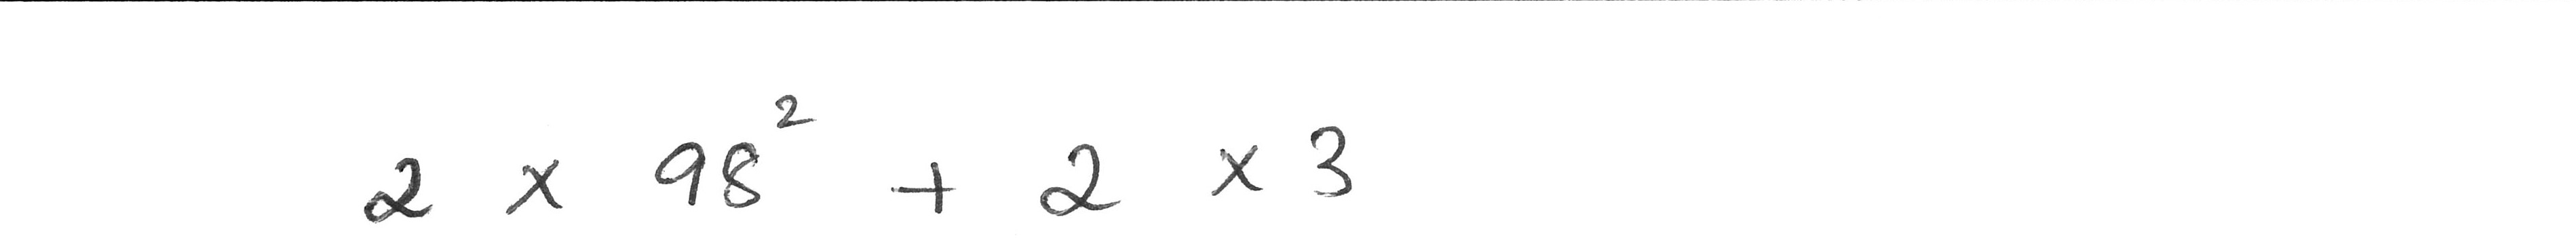

-1

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(lines[0])
cv2.waitKey(0)

In [ ]:
digits = dig_contour(lines[0])

In [ ]:
len(digits)

9

In [ ]:
digits = remove_overlap(digits)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


In [ ]:
len(digits)

7

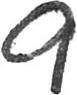

In [ ]:
#digits from the lines

(x,y,w,h) = cv2.boundingRect(digits[1])
roi_l = lines[0][y:y + h, x:x + w]
cv2_imshow(roi_l)
# cv2.waitKey(0)
# cv2.imwrite("new_l.jpg",roi_l)

In [ ]:
# roi_l = roi_l/255
img_num = cv2.resize(roi_l,(28,28))
img_gray = cv2.cvtColor(img_num,cv2.COLOR_BGR2GRAY )
# ret, thresh = cv2.threshold(img_gray, 150,255, cv2.THRESH_BINARY)
im_resize = cv2.bitwise_not(img_gray)
img_num = np.reshape(im_resize,(1,1,28,28))
# img_num = np.reshape(x_test[0],(1,1,28,28))

In [ ]:
pred = model.predict(img_num)
y_pred=np.argmax(pred,axis=1)
y_pred 

array([11])